In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
import pydicom as PDCM

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
dataset = PDCM.read_file('/content/drive/MyDrive/CT_dataset/dicom_dir/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')



In [ ]:
print(dataset.pixel_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
dataset.pixel_array.shape

(512, 512)

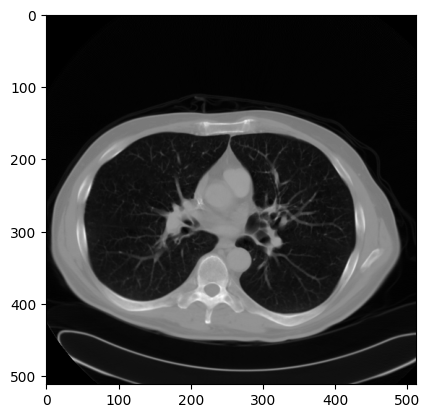

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(dataset.pixel_array , cmap='gray')
plt.show()

In [ ]:
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [ ]:
path = '/content/drive/MyDrive/CT_dataset/dicom_dir/'

In [ ]:
import os
import cv2
import numpy as np
import pydicom as dicom

images = []
for file in os.listdir(path):
    f = dicom.read_file(os.path.join(path,file)).pixel_array
    fr = cv2.resize(f , (256,256))
    images.append(fr)


In [ ]:
X = np.array(images)
X = X.reshape(100,256,256,1)
X.shape

(100, 256, 256, 1)

In [ ]:
labels = []
for file in os.listdir(path):
    labels.append(file.split('_')[-2])

Y = np.array(labels)
Y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train.shape

(80, 256, 256, 1)

In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from keras import layers, models, regularizers

**Neural Network **

Traditional CNN

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64 ,(3,3) , padding = 'same' , kernel_regularizer=regularizers.l2(0.0001) , input_shape = (256,256,1)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(128 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(128 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(512 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))


model.add(layers.Conv2D(4096 ,(3,3) , kernel_regularizer=regularizers.l2(0.0001) , padding = 'same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(2, activation='sigmoid') )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 activation (Activation)     (None, 256, 256, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                        

In [ ]:
import tensorflow as tf

sgd = tf.keras.optimizers.SGD(0.001)
model.compile(loss='categorical_crossentropy' , optimizer=sgd , metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range = 40,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True,
                             brightness_range = (0.5, 1.5))

In [ ]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=10),
         epochs=20,
         validation_data=datagen.flow(x_test,y_test))

Epoch 1/20
8/8 [==============================] - 311s 37s/step - loss: 1.9377 - accuracy: 0.4875 - val_loss: 1.2333 - val_accuracy: 0.3500
Epoch 2/20
8/8 [==============================] - 293s 37s/step - loss: 1.1613 - accuracy: 0.5875 - val_loss: 1.2288 - val_accuracy: 0.3500
Epoch 3/20
8/8 [==============================] - 285s 36s/step - loss: 1.1631 - accuracy: 0.4875 - val_loss: 1.2497 - val_accuracy: 0.3000
Epoch 4/20
8/8 [==============================] - 289s 37s/step - loss: 1.1504 - accuracy: 0.5625 - val_loss: 1.3258 - val_accuracy: 0.4500
Epoch 5/20
8/8 [==============================] - 283s 36s/step - loss: 1.1961 - accuracy: 0.5750 - val_loss: 1.1980 - val_accuracy: 0.3500
Epoch 6/20
8/8 [==============================] - 281s 35s/step - loss: 1.1496 - accuracy: 0.5750 - val_loss: 1.2233 - val_accuracy: 0.4500
Epoch 7/20
8/8 [==============================] - 286s 36s/step - loss: 1.1713 - accuracy: 0.6125 - val_loss: 1.2118 - val_accuracy: 0.4500
Epoch 8/20
8/8 [====

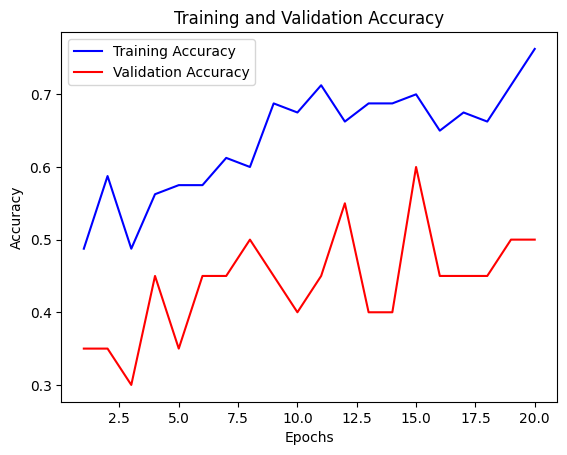

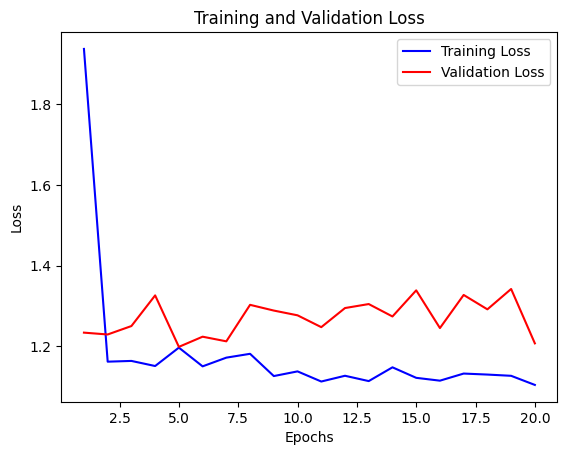

In [ ]:
import matplotlib.pyplot as plt

# Extracted metrics from the training history
num_epochs =20
epochs = range(1, num_epochs + 1)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save("model.h5")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score

# Make predictions on the test data
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Convert one-hot encoded labels to integer labels
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1-score:", f1)


1/1 [==============================] - 40s 40s/step
Accuracy: 0.4
Precision: 0.38461538461538464
F1-score: 0.4545454545454546
